In [1]:
import numpy as np
import numpy
from numpy import pi
import numpy
import scipy
import qiskit
from scipy.stats import unitary_group
from qiskit import transpile
import scipy.linalg as sl
import numpy.linalg as nl
from scipy.linalg import cossin
from qiskit.quantum_info import Operator, Statevector
from qiskit import QuantumCircuit
from qiskit.circuit.library import UGate,UCPauliRotGate
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
import sys
sys.path.append('./src')
##
import utils_synth
import oracle_synth
import lcu
import lchs
import _quick_test
import importlib
importlib.reload(lcu)
importlib.reload(lchs)
importlib.reload(utils_synth)
importlib.reload(oracle_synth)
importlib.reload(_quick_test)
##
from utils_synth import *
from oracle_synth import *
from lchs import *
from src.lcu import *
from _quick_test import *

rng = numpy.random.default_rng(4290962056973923694427)
np.set_printoptions(precision=8, suppress=True)

XX = numpy.kron(X(), X())
YY = numpy.kron(Y(), Y())
ZZ = numpy.kron(Z(), Z())

In [17]:
# U = np.array(
# [[-0.25465013+0.9074952j,   0.21540309+0.22200635j, -0.01192274-0.03917138j,
#    0.03110411-0.11522346j],
#  [ 0.27838865-0.11483014j, -0.06375389+0.91509963j, -0.08319954-0.13378439j,
#    0.06665744+0.1964135j ],
#  [ 0.01090699+0.02753727j, -0.10411445+0.13228927j, -0.24069055+0.9472713j,
#   -0.10196788-0.07162516j],
#  [-0.08705646+0.11163993j,  0.1127194 -0.14763761j, -0.12356717+0.05458321j,
#   -0.15464697+0.95041639j]]
#              )

rng = numpy.random.Generator(numpy.random.PCG64(7263488743979665820111))
scipy_uni = scipy.stats.unitary_group
scipy_uni.random_state = rng
U = scipy_uni.rvs( 2**2 )


U.T.conj() @ U

array([[ 1.+0.j, -0.+0.j, -0.+0.j,  0.-0.j],
       [-0.-0.j,  1.-0.j, -0.+0.j, -0.+0.j],
       [-0.-0.j, -0.-0.j,  1.-0.j, -0.+0.j],
       [ 0.+0.j, -0.-0.j, -0.-0.j,  1.+0.j]])

OrderedDict({'rz': 9, 'ry': 6, 'cx': 3})


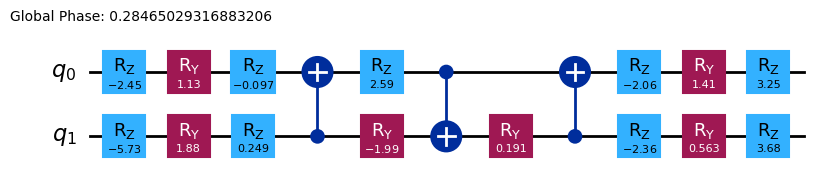

In [18]:
basis_gates = ['cx', 'rx', 'ry', 'rz']
my_u = qiskit.transpile(synthu_qsd(U), basis_gates=basis_gates,optimization_level=2)
print(my_u.count_ops())
my_u.draw('mpl')

OrderedDict({'rz': 13, 'ry': 7, 'cx': 3, 'rx': 1})


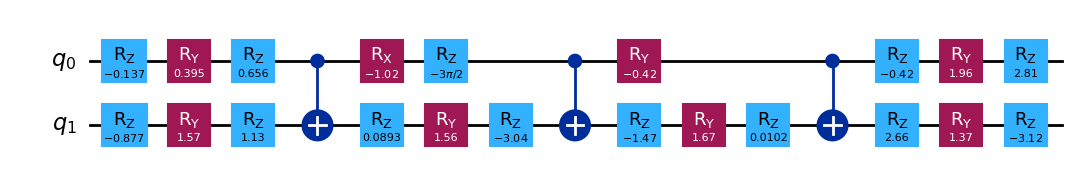

In [19]:
qi_circ = qiskit.QuantumCircuit( int(np.log2(U.shape[0])) )
qi_circ.append(qiskit.circuit.library.UnitaryGate(U), range(int(np.log2(U.shape[0]))))
qi_u = qiskit.transpile(qi_circ, basis_gates=basis_gates,optimization_level=2)
print(qi_u.count_ops())
qi_u.draw('mpl')

In [20]:
qiskit.transpile(selected_controlled_circuit(my_u, 6, to_known_basis=True, reverse_bits=False), basis_gates=['cx','u'], optimization_level=2).count_ops()

OrderedDict([('u', 1613), ('cx', 1578)])

In [21]:
qiskit.transpile(qi_u.to_gate().control(6).definition, basis_gates=['cx','u'], optimization_level=2).count_ops()

  --DEBUG Qiskit rz
  --DEBUG Qiskit ry
  --DEBUG Qiskit rz
  --DEBUG Qiskit rz
  --DEBUG Qiskit ry
  --DEBUG Qiskit rz
  --DEBUG Qiskit cx
  --DEBUG Qiskit rx
  --DEBUG Qiskit rz
  --DEBUG Qiskit rz
  --DEBUG Qiskit ry
  --DEBUG Qiskit rz
  --DEBUG Qiskit cx
  --DEBUG Qiskit ry
  --DEBUG Qiskit rz
  --DEBUG Qiskit ry
  --DEBUG Qiskit rz
  --DEBUG Qiskit cx
  --DEBUG Qiskit rz
  --DEBUG Qiskit ry
  --DEBUG Qiskit rz
  --DEBUG Qiskit rz
  --DEBUG Qiskit ry
  --DEBUG Qiskit rz


OrderedDict([('u', 1855), ('cx', 1830)])

In [ ]:
type(qiskit.QuantumCircuit(2).to_gate())